In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer,LabelEncoder,OneHotEncoder
from sklearn import metrics,model_selection,linear_model
import matplotlib.pyplot as plt
from sklearn import preprocessing
import plotly as px
from geopy.geocoders import Nominatim

In [28]:
import plotly
import plotly.express as px 

In [29]:
data=pd.read_excel('data_ford_price.xlsx')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


In [31]:
data=data.dropna(axis=0)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5202 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         5202 non-null   int64  
 1   year          5202 non-null   int64  
 2   condition     5202 non-null   int64  
 3   cylinders     5202 non-null   int64  
 4   odometer      5202 non-null   int64  
 5   title_status  5202 non-null   object 
 6   transmission  5202 non-null   object 
 7   drive         5202 non-null   object 
 8   size          5202 non-null   object 
 9   lat           5202 non-null   float64
 10  long          5202 non-null   float64
 11  weather       5202 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 528.3+ KB


In [33]:
X=data.drop(['price'],axis=1)
y=data['price']

In [34]:
X=X.drop(['title_status','transmission','drive','size'],axis=1)

In [35]:
from sklearn.feature_selection import RFE,SelectKBest,f_regression

estimator=linear_model.LinearRegression()
selector_1=RFE(estimator,n_features_to_select=3,step=1)
selector_1.fit(X,y)
selector_1.get_feature_names_out()

array(['year', 'condition', 'cylinders'], dtype=object)

In [36]:
selector_2=SelectKBest(f_regression,k=3)
selector_2.fit(X,y)
selector_2.get_feature_names_out()

array(['year', 'condition', 'odometer'], dtype=object)

In [37]:
X1=X[['year', 'condition', 'cylinders']]
X2=X[['year', 'condition', 'odometer']]

In [38]:
X1_train,X1_test,y1_train,y1_test=model_selection.train_test_split(X1,y,test_size=0.2,random_state=42)
X2_train,X2_test,y2_train,y2_test=model_selection.train_test_split(X2,y,test_size=0.2,random_state=42)



In [39]:
model_1=linear_model.LinearRegression()
model_1.fit(X1_train,y1_train)
preidict_1=model_1.predict(X1_test)
print(metrics.mean_absolute_error(y1_test,preidict_1))
print(metrics.r2_score(y1_test,preidict_1))  

5000.830004854764
0.5788273195996286


In [40]:
model_2=linear_model.LinearRegression()
model_2.fit(X2_train,y2_train)
preidict_2=model_2.predict(X2_test)
print(metrics.mean_absolute_error(y2_test,preidict_2))
print(metrics.r2_score(y2_test,preidict_2)) 

4644.978674584224
0.6281157089153808


In [41]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
model=RandomForestRegressor(max_depth=7,min_samples_leaf=5)
model.fit(X_train,y_train)
preidict=model.predict(X_test)
print(metrics.mean_absolute_error(y_test,preidict))
print(metrics.r2_score(y_test,preidict)) 

2782.81008143381
0.8269739615473575


In [48]:
model=tree.DecisionTreeRegressor(max_depth=7,min_samples_leaf=5)
model.fit(X_train,y_train)
preidict_train=model.predict(X_train)
print(metrics.mean_absolute_error(y_train,preidict_train))
print(metrics.r2_score(y_train,preidict_train)) 

2627.300740733239
0.8586323314570764


In [50]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold

In [68]:
model=RandomForestRegressor(random_state=42,max_depth=7,min_samples_leaf=5)
skf=KFold(n_splits=5,shuffle=True,random_state=42)

In [63]:
def plot_learning_curve(model, X, y, cv, scoring="f1", ax=None, title=""):
    # Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(
        estimator=model,  # модель
        X=X,  # матрица наблюдений X
        y=y,  # вектор ответов y
        cv=cv,  # кросс-валидатор
        scoring=scoring,  # метрика
    )
    # Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    # Если координатной плоскости не было передано, создаём новую
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))  # фигура + координатная плоскость
    # Строим кривую обучения по метрикам на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label="Train")
    # Строим кривую обучения по метрикам на валидационных фолдах
    ax.plot(train_sizes, valid_scores_mean, label="Valid")
    # Даём название графику и подписи осям
    ax.set_title("Learning curve: {}".format(title))
    ax.set_xlabel("Train data size")
    ax.set_ylabel("Score")
    # Устанавливаем отметки по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    # Устанавливаем диапазон оси ординат
    ax.set_ylim(0, 1)
    # Отображаем легенду
    ax.legend() 

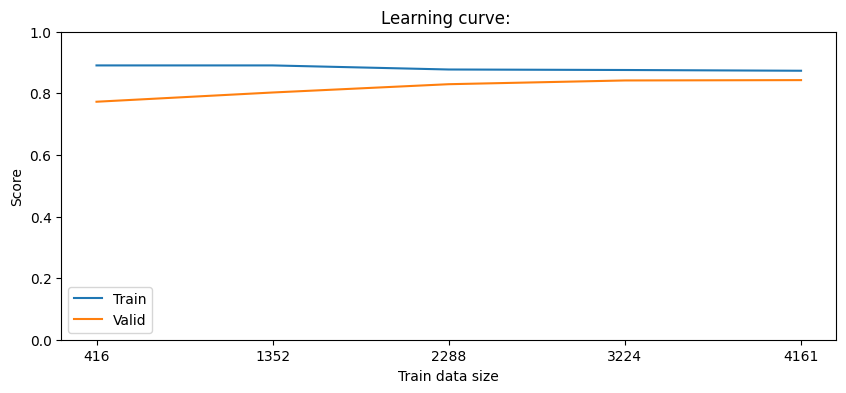

In [69]:
plot_learning_curve(model,X,y,cv=skf,scoring='r2');